# Black Friday


É um Hackathon da analytics vidhya.

Sé trata de uma problematica de vendas com o Objetivo de prever as vendas durante a black friday.

**Problematica**: Uma empresa de varejo "ABC Private Limited" deseja entender o comportamento de compra do cliente (especificamente, valor da compra) em relação a vários produtos de diferentes categorias. Eles compartilharam o resumo de compra de vários clientes para produtos de alto volume selecionados no mês passado. O conjunto de dados também contém dados demográficos do cliente (idade, sexo, estado civil, tipo_de_ cidade, estado_de_cidade_cidade), detalhes do produto (id do produto e categoria do produto) e valor total da compra do mês passado. Agora, eles desejam criar um modelo para prever o valor da compra do cliente em relação a vários produtos, o que os ajudará a criar uma oferta personalizada para clientes em relação a diferentes produtos.
(Lembrando que um produto pode ter mais de uma categoria.)

**Perguntas a ser respondidas:**



*   Tem distinção na quantidade de clientes Masculinos para o feminino?
*   Valor medio para cada genero?
*   Valores gastos total por cada genero?
*   idade predominante entre os usuarios?
*   valor medio gastos por faixa etaria?
*   valor total gastos por cada faixa etario?
*   cidade com maior numero de usuario?
*   valor medio de compra de cada cidade?
*   valor total gasto por cada cidade?
*   quantidade de usuarios de cada estado civil?
*   valor medio gasto por cada estado civil?
*   valor todal gasto por cada estado civil?
*   genero dos clientes por estado civel e valor gastos total por eles?
*   Como os valores se comportam por categoria de produtos?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


In [2]:
warnings.filterwarnings("ignore")

# Carregando o dataframe

In [3]:
df = pd.read_csv('train.csv')

# Visualização inicial dos dados

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Agora temos um conhecimento previo sobre os dados seus tipos e como estão agrupados. E percebemos que as colunas Product_category_2 e Product_category_3 se encontra com 31,56% e 69,67 de valores nulos respectiviamente em relação aos dados.

# Explratory Data Analysis (EDA)

Text(-11.805555555555555, 0.5, 'densidade de compradores')

<Figure size 800x600 with 0 Axes>

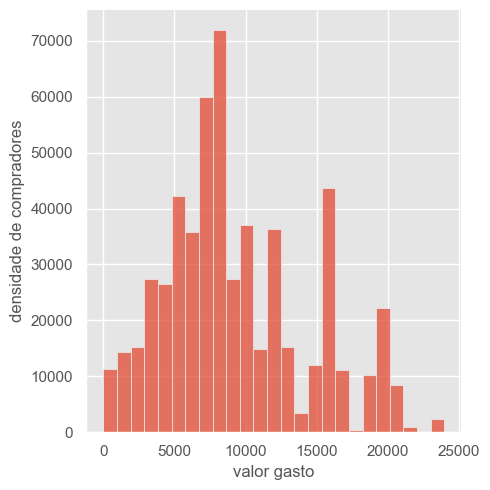

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
sns.displot(df.Purchase, bins=25)
plt.xlabel('valor gasto')
plt.ylabel('densidade de compradores')

<Axes: >

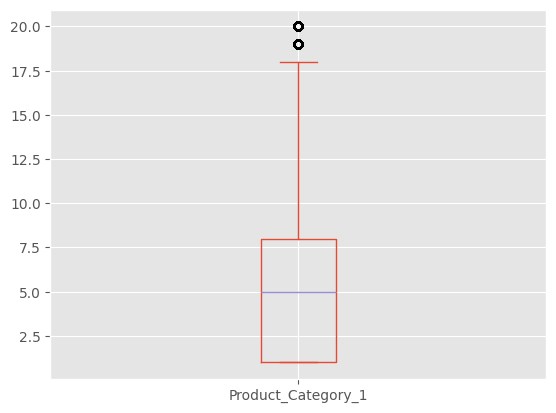

In [10]:
df['Product_Category_1'].plot.box()

<Axes: >

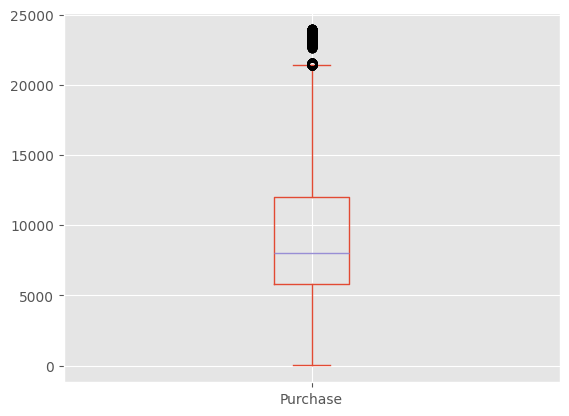

In [11]:
df['Purchase'].plot.box()

A partir dos graficos fica facil perceber que a distribuição de gastos por compradores se tem uma grande densidade de clientes que gastam entre entre a faixa  de 5.000 a 10.000, e que a partir dos valores acima de 20.000 a 21.000 podem ser considerados outlines para o modelo se encontrando com 3541 registros que valem cerca de 0.64% dos dados totais.

# Valor por genero

In [12]:
df[['Gender','Purchase']].groupby(['Gender']).mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


In [13]:
df[['Gender','Purchase']].groupby(['Gender']).sum()

,Purchase
Gender,
F,1186232642
M,3909580100


<Axes: xlabel='Gender', ylabel='count'>

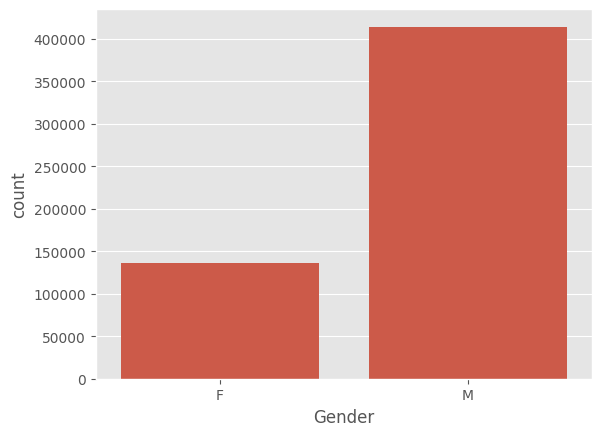

In [14]:
sns.countplot(data=df, x='Gender')

Com esta visualização podemos perceber uma discrepancia entre a quantidade de clientes masculino e feminino, com os clientes masculinos sendo referente a **75,3%** dos registros. Alem de uma diferença de aproximadamente **703** da media dos valores de compras em relação do masculino com 9437.52 e o feminino com 8734.56.


# Valor gasto por Faixa etaria e Faixa predominante entre os clientes

In [15]:
df[["Age", "Purchase"]].groupby(['Age']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


In [16]:
df_g = df[['Age','Purchase']].groupby(['Age']).count().sort_values(by='Purchase',ascending=False)
df_g

,Purchase
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


<Axes: xlabel='Age', ylabel='count'>

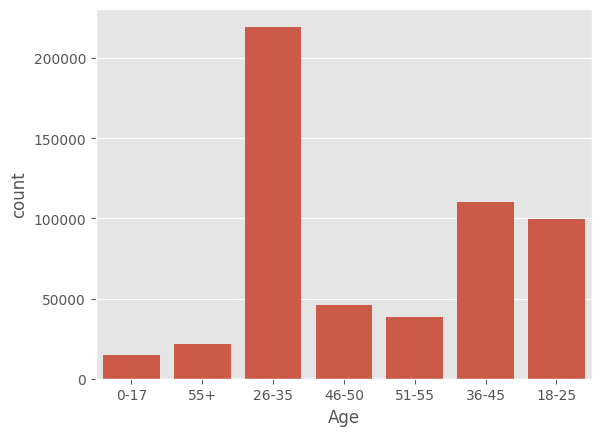

In [17]:
sns.countplot(data=df, x='Age')

In [18]:
df.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: count, dtype: int64

Percebemos que apesar da faixa etaria 51-55 apresentar valor medio de compra de 9534, ela não apresenta a maior quantidade de registros contando apenas com 38501 registros ficando em 5° posição, e a faixa de 26-35 apesar da sua media de 9252 o colocar em 4° posição a quantidade de registros é muito superior as demais contando com 219587 registros. E a distinção de generos presente no agrupamento tende a ter um quantia maior do genero masculino.

# Cidade que apresentaram maior quantidade de compras

In [19]:
df[['City_Category', "Purchase"]].groupby(['City_Category']).mean().sort_values(by='Purchase', ascending=False)

,Purchase
City_Category,
C,9719.920993
B,9151.300563
A,8911.939216


In [20]:
df[['City_Category', "Purchase"]].groupby(['City_Category']).sum().sort_values(by='Purchase',ascending=False)

,Purchase
City_Category,
B,2115533605
C,1663807476
A,1316471661


<Axes: xlabel='City_Category', ylabel='count'>

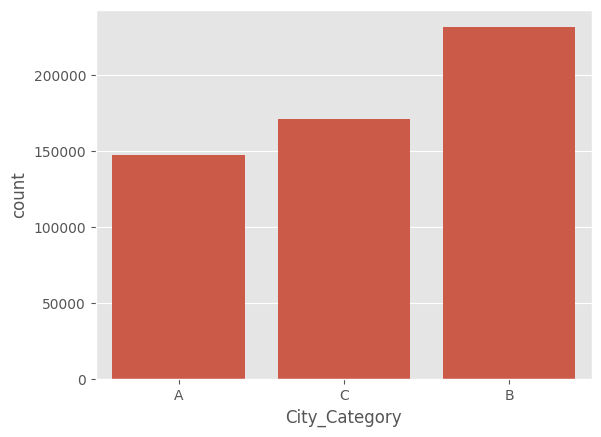

In [21]:
sns.countplot(data=df, x='City_Category')

Com esta visualização podemos notar que a media de compra presente na cidade C se encontra superior com 9719.92, e a cidade B com a maior quantidade de registros.

# Comportamento dos clientes por estado civil

In [22]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [23]:
df.groupby('Gender')['Marital_Status'].value_counts()


Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
Name: count, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

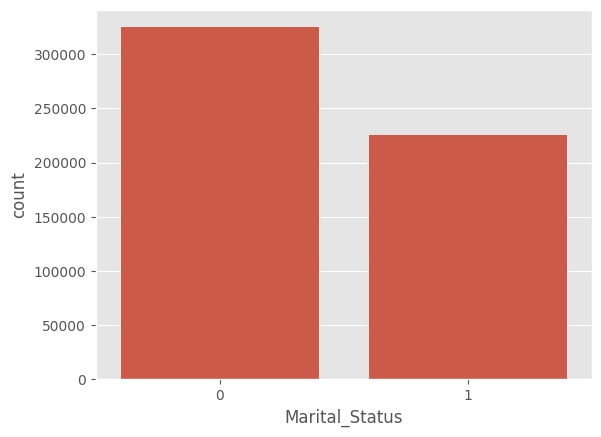

In [24]:
sns.countplot(data=df, x='Marital_Status')

# Correlação perante os dados

In [25]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [26]:
# preparando codigos não numericos
elem_not_nun = [x for x in df.columns if df[x].dtypes == object and df[x].name != 'Product_ID' ]
df = pd.get_dummies(df,  columns=elem_not_nun )
df = df.drop(columns='Product_ID')


utilizei a transformação dos dados categoricos com o get_dummies, para que, quando fazer a matrix de correlação poder ter uma visão mais ampla de como os dados se relacionam no todo. A exclução do product_id se deu por causa da quantia de dados que ele apresentara quando transformado assim atrapalhando na visao todo.

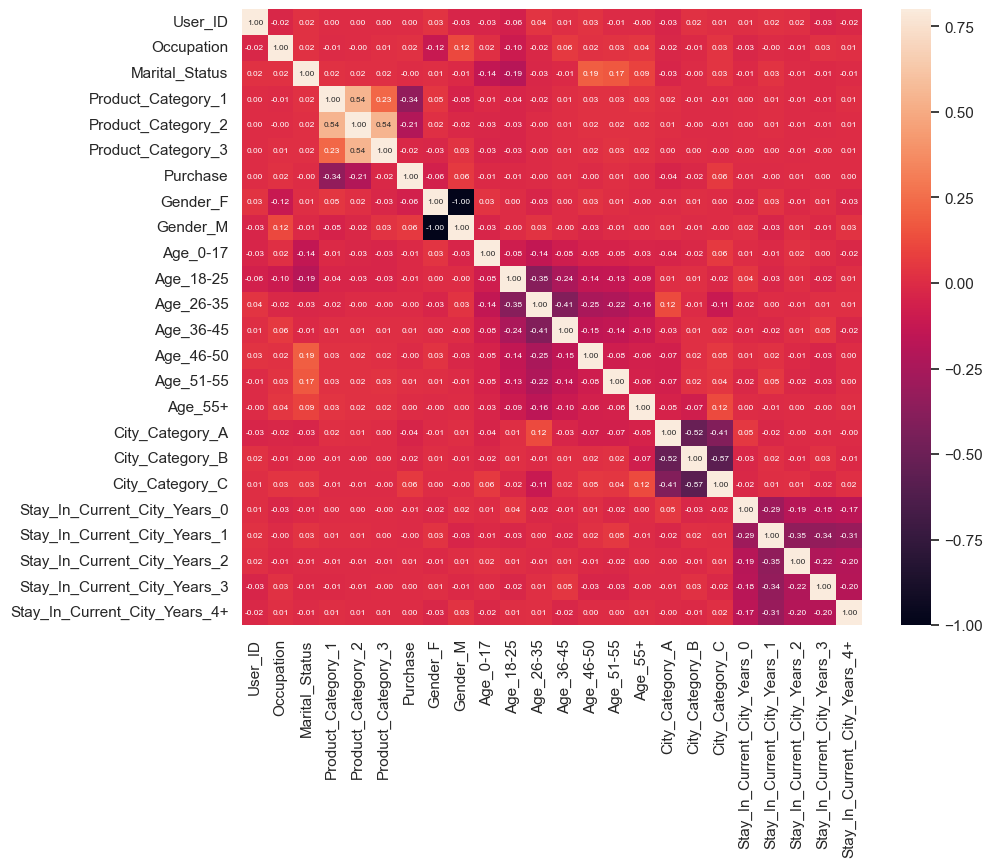

In [ ]:
matrix = df.corr()
sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(matrix, vmax=.8,annot_kws={'size': 6}, annot=True, fmt='.2f')
plt.show()

A partir da correlação dos dados podemos perceber que os dados apresentam uma baixa correlação sendo a com a maior relação sendo de 0,54 do product_Category_1 e product_category_2. 
E ja podemos saber que utilizaremos o RandomizedSearchCV em vez do GridSearch logo que o uso do GridSearch e melhor recomendado quando os dados tem uma melhor correlação